In [23]:
import pandas as pd 
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\gapminder(1).csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [24]:
df.shape

(139, 10)

In [25]:
df.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [26]:
df1=df

In [27]:
df=pd.get_dummies(df)

In [28]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [29]:
x=df.drop(["life"],1)
y=df["life"]

In [30]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()

In [31]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y, test_size = 0.3, random_state = 0)

In [32]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [33]:
from sklearn.metrics import r2_score

In [34]:
y_pred=knn.predict(X_test)

In [35]:
r2_score(y_test,y_pred)

-0.47022442607745663

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lin_reg=LinearRegression()

In [67]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
y_pred=lin_reg.predict(X_test)

In [69]:
r2_score(y_test,y_pred)

0.81710198116303934

In [71]:
import seaborn as sns
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


In [72]:
import matplotlib.pyplot as plt

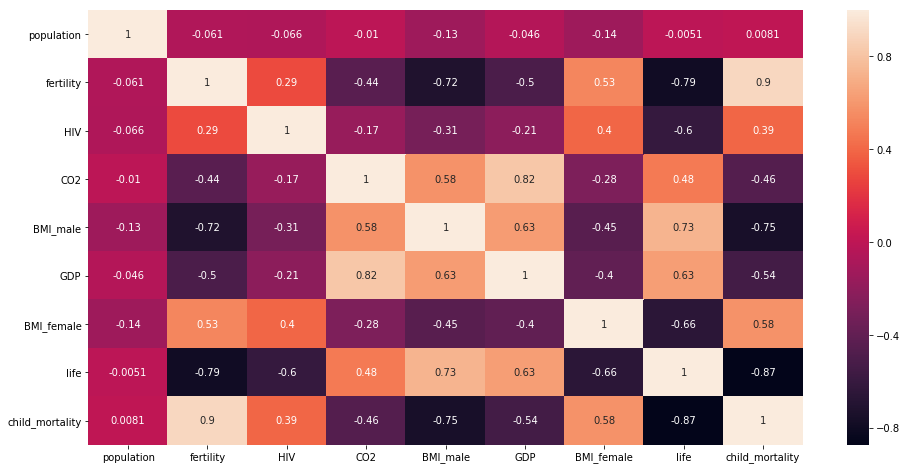

In [77]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [78]:
X=df1[["fertility","GDP"]]
y=df1["child_mortality"]

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lin_reg=LinearRegression()

In [85]:
X_train,X_test,y_train,y_test = tts(X,y, test_size = 0.3, random_state = 42)

In [86]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
y_pred=lin_reg.predict(X_test)

In [88]:
r2_score(y_test,y_pred)

0.88418893933318488

In [180]:
s=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\50_Startups.csv")
s.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [181]:
s.shape

(50, 5)

In [182]:
s["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [183]:
s=pd.get_dummies(s)

In [184]:
s=s.drop(["State_New York"],1)

In [185]:
X=s.drop(["Profit"],1)
y=s["Profit"]

In [186]:
X_train,X_test,y_train,y_test = tts(X,y, test_size = 0.3, random_state = 42)

In [187]:
lin_reg=LinearRegression(normalize=True)

In [188]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [189]:
y_pred=lin_reg.predict(X_test)

In [190]:
r2_score(y_test,y_pred)

0.93971080633557869